In [118]:
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import requests
import nltk, nltk.sentiment, sklearn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
name=nltk.corpus.names

In [74]:
path2data='C:/Users/frede/OneDrive/Documents/GitHub/Group/Group-31-SoDa/Data/movie_1.csv'
done=pd.read_csv(path2data)
done['Female'].fillna(0, inplace= True)
done['d_Female'].fillna(0, inplace= True)
done['d_Drop'].fillna(0, inplace= True)
done['Gross'].fillna(0, inplace= True)

In [151]:
work=done.groupby(['Year'])
work_d=done[done.d_Drop == 0]
work_d.loc[(2010 <= work_d.Year) & (work_d.Year < 2020), 'Decade'] = '2010s'
work_d.loc[(2000 <= work_d.Year) & (work_d.Year < 2010), 'Decade'] = '2000s'
work_d.loc[(1990 <= work_d.Year) & (work_d.Year < 2000), 'Decade'] = '1990s'
work_d.loc[(1980 <= work_d.Year) & (work_d.Year < 1990), 'Decade'] = '1980s'

C:\Users\frede\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\frede\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


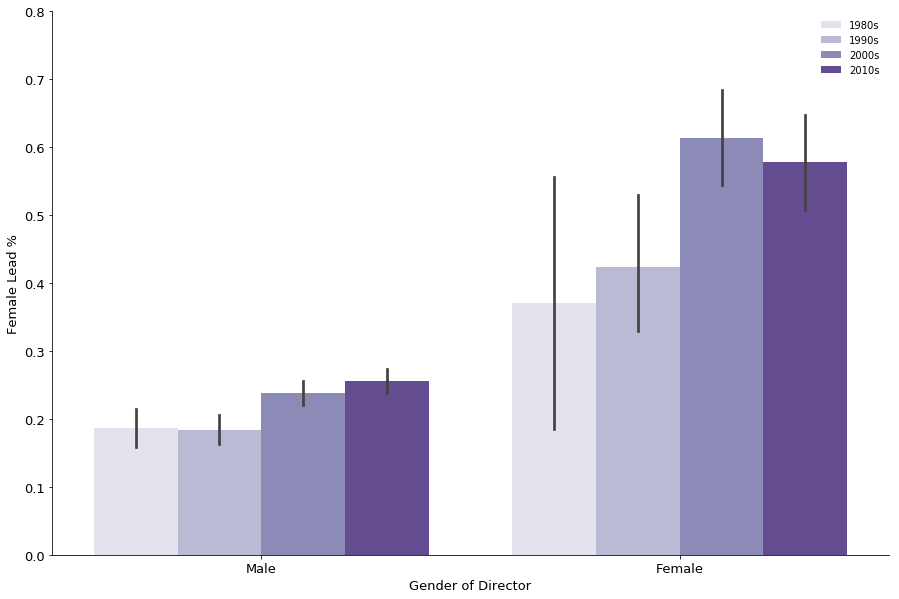

In [154]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.set_ylim([0,0.8])
gender=['Male','Female']

sns.barplot(x='d_Female', y='Female', hue='Decade',hue_order=["1980s","1990s",'2000s','2010s'] , data=work_d, palette=('Purples'))
plt.xlabel('Gender of Director', fontsize='13')
plt.ylabel('Female Lead %', fontsize='13')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(gender))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)

ax.legend(frameon=False)

sns.despine(left=False, bottom=False, right=True)

In [127]:
works=work['d_Female'].count()